In [110]:
# opto_step_series_plotter.ipynb
# Avery Krieger 05/22/2023

# Adapts code from opto_step_series.py and fig_generator.ipynb to plot 
# data from the opto_step_series experiments 

%load_ext autoreload
%autoreload 2

from visanalysis.analysis import imaging_data, shared_analysis
from visanalysis.util import plot_tools

from matplotlib import pyplot as plt
from matplotlib.ticker import FixedLocator, FixedFormatter

import os
import numpy as np
from pathlib import Path

# Load in flies
folder_path = "/Volumes/ABK2TBData/data_repo/bruker/20230519.selected"
exp_date = "2023-05-19"
folder_path1 = "/Volumes/ABK2TBData/data_repo/bruker/20230524.moco"
exp_date1 = "2023-05-24"

# asta_fly1_prox = [folder_path, exp_date, "2", "medulla_terminals"]
asta_fly1_prox = [folder_path, exp_date, "1", "medulla_terminals_cat2"]

asta_fly2_prox_all = [folder_path, exp_date, "5", "medulla_terminals_all"]
asta_fly2_prox_cat2 = [folder_path, exp_date, "5", "medulla_terminals_cat2"]

asta_fly3_prox_all = [folder_path, exp_date, "8", "medulla_terminals_all"]

# 5/24/2023 flies
asta_fly4_prox_all = [folder_path1, exp_date1, "2", "medulla_terminals"]
asta_fly4_IR_ON = [folder_path1, exp_date1, "3", "medulla_terminals"]

asta_fly5_prox_all = [folder_path1, exp_date1, "5", "medulla_terminals"]
asta_fly5_IR_ON = [folder_path1, exp_date1, "6", "medulla_terminals"]
# opto-specific ROIs
asta_fly5_prox_opto = [folder_path1, exp_date1, "5", "medulla_terminals_opto"]
asta_fly5_IR_ON_opto = [folder_path1, exp_date1, "6", "medulla_terminals_opto"]

asta_fly6_prox_all = [folder_path1, exp_date1, "8", "medulla_terminals"]
asta_fly6_IR_ON = [folder_path1, exp_date1, "9", "medulla_terminals"]


asta_prox_5_19 = [asta_fly1_prox, asta_fly2_prox_cat2, asta_fly3_prox_all]
asta_fly_list_5_19 = [1, 2, 3]

asta_prox_5_24 = [asta_fly4_prox_all, asta_fly5_prox_all, asta_fly6_prox_all]
asta_fly_list_5_24 = [4, 5, 6]

asta_prox_5_24_opto = [asta_fly4_prox_all, asta_fly5_prox_opto, asta_fly6_prox_all]
asta_fly_list_5_24_opto = [4, 5, 6]

asta_prox_5_24_IR_ON = [asta_fly4_IR_ON, asta_fly5_IR_ON, asta_fly6_IR_ON]
asta_fly_list_5_24_IR_ON = [4, 5, 6]

asta_prox_5_24_IR_ON_opto = [asta_fly4_IR_ON, asta_fly5_IR_ON_opto, asta_fly6_IR_ON]
asta_fly_list_5_24_IR_ON_opto = [4, 5, 6]

# all together
asta_prox_all = [asta_fly1_prox, asta_fly2_prox_all, asta_fly3_prox_all, asta_fly4_prox_all, asta_fly5_prox_opto, asta_fly6_prox_all]
asta_fly_list_all = [1, 2, 3, 4, 5, 6]

# Housekeeping:
condition_name = 'current_led_intensity'
save_directory = "/Volumes/ABK2TBData/lab_repo/analysis/outputs/opto_step_series/" #+ experiment_file_name + "/"
Path(save_directory).mkdir(exist_ok=True)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Plotting function and other housekeeping

In [111]:
def config_matplotlib():
    plt.rcParams['svg.fonttype'] = 'none'
    plt.rcParams.update({'font.family': 'sans-serif'})
    plt.rcParams.update({'font.sans-serif': 'Helvetica'})

config_matplotlib()

def convertRGBtoFraction(R_value, G_Value, B_Value):
    R_Fraction = R_value/255
    G_Fraction = G_Value/255
    B_Fraction = B_Value/255

    return (R_Fraction, G_Fraction, B_Fraction)

paleDarkBlue = convertRGBtoFraction(82, 63, 232)

def calculateOptoPercentages(unique_parameter_values):
    # Determine percentage values of opto
    opto_values = []
    for upv in unique_parameter_values:
        opto_values = np.append(opto_values, ((upv[0]/4)*100))
    return opto_values

# opto_1 = ((0.25/4)*100)
# opto_2 = ((1/4)*100)
# opto_3 = ((4/4)*100)
# opto_values = (str(opto_1)+'%', str(opto_2)+'%', str(opto_3)+'%')

In [112]:
# Function that takes in a fly and outputs the trial data
def getTrialData(fly):
    file_path = os.path.join(fly[0], fly[1] + ".hdf5")
    ID = imaging_data.ImagingDataObject(file_path, fly[2], quiet=True)
    roi_data = ID.getRoiResponses(fly[3])
    time_vector = roi_data['time_vector']

    unique_parameter_values, mean_response, sem_response, trial_response_by_stimulus_intensity = ID.getTrialAverages(roi_data.get('epoch_response'), parameter_key=condition_name)

    return unique_parameter_values, mean_response, sem_response, trial_response_by_stimulus_intensity, time_vector

## Plot individual ROIs

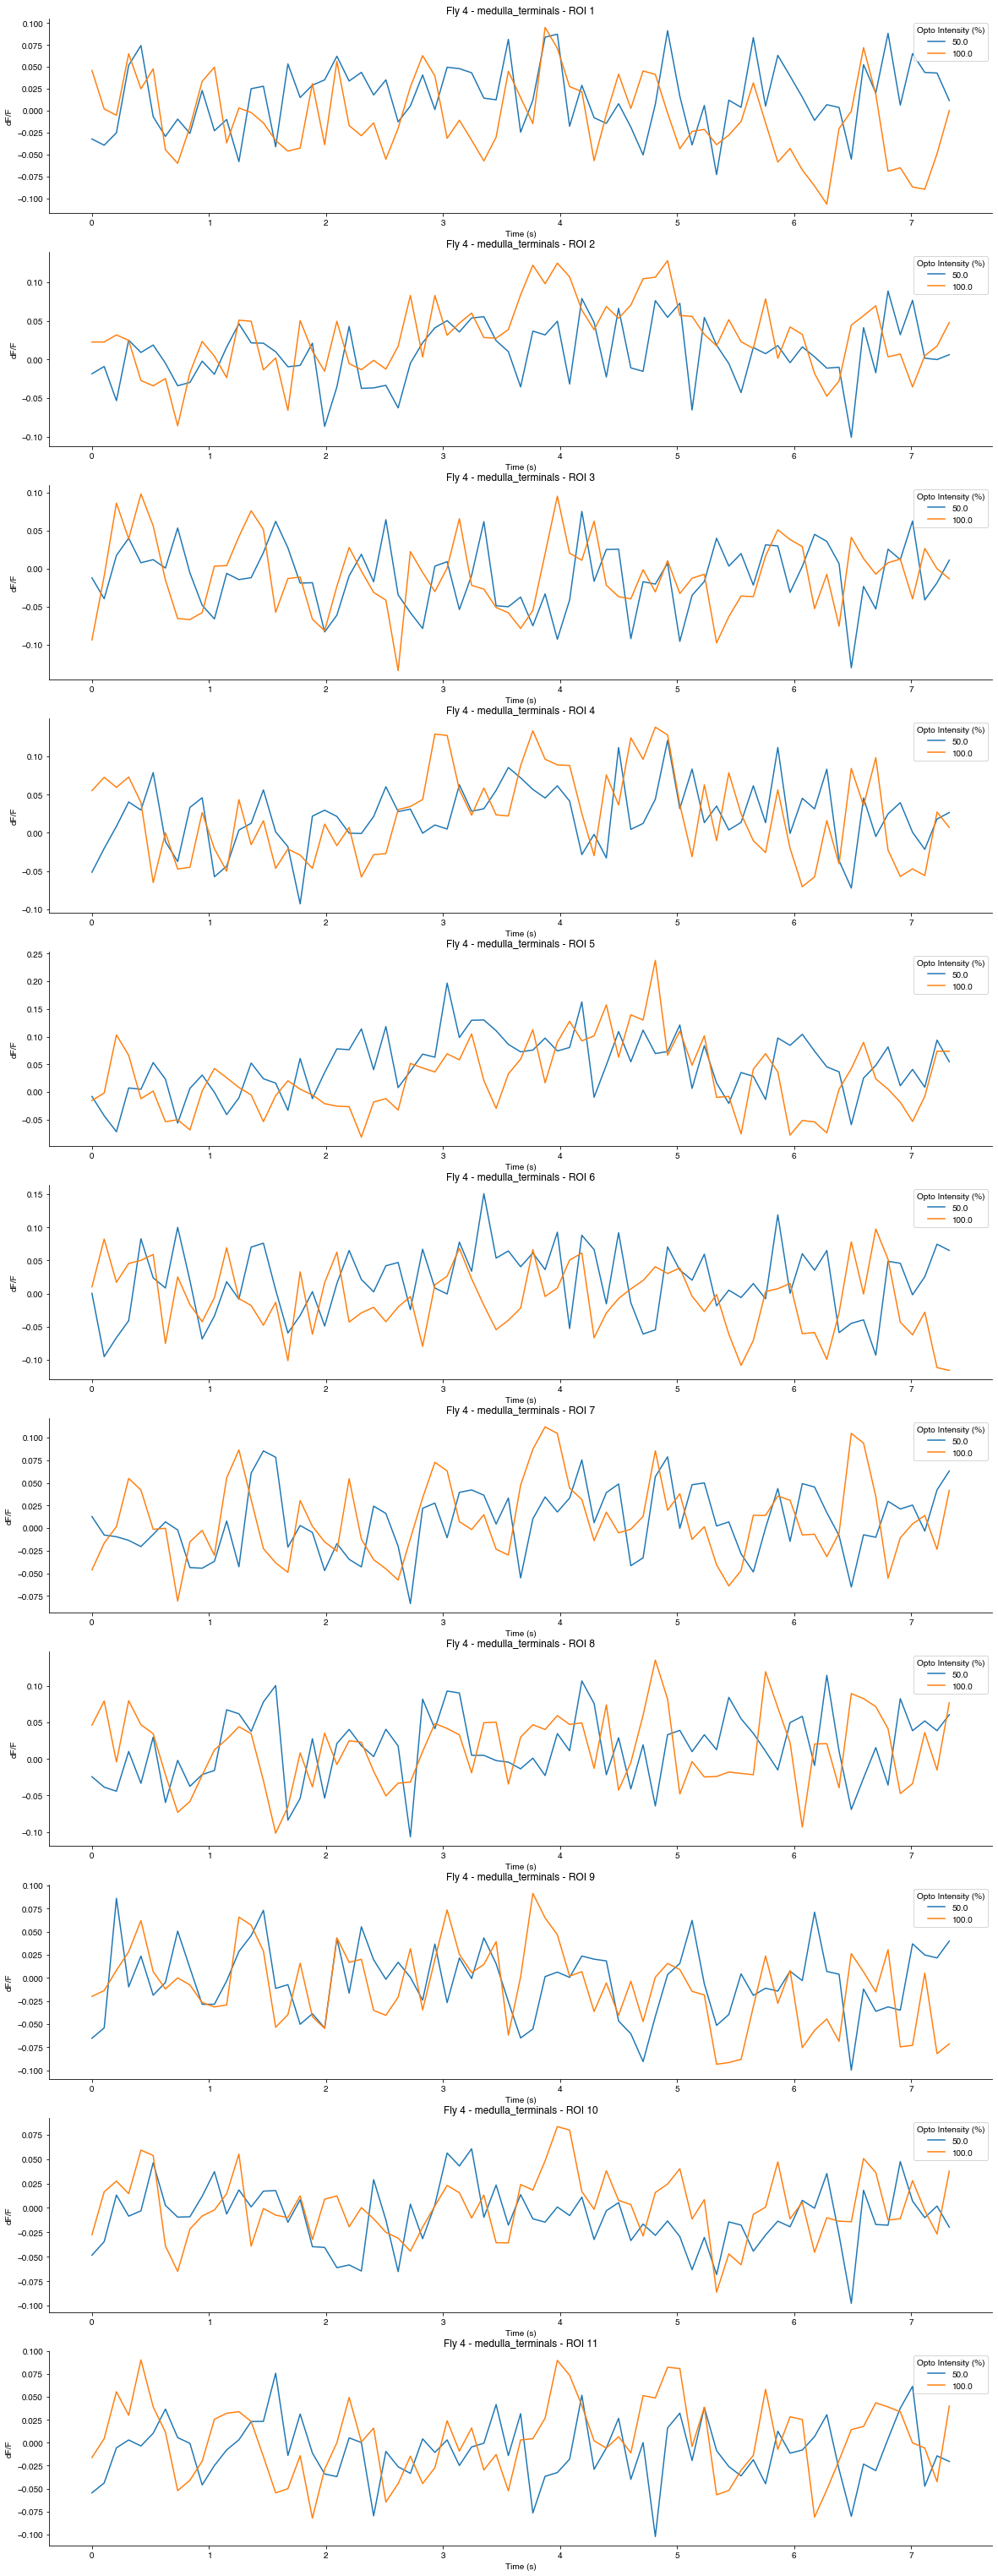

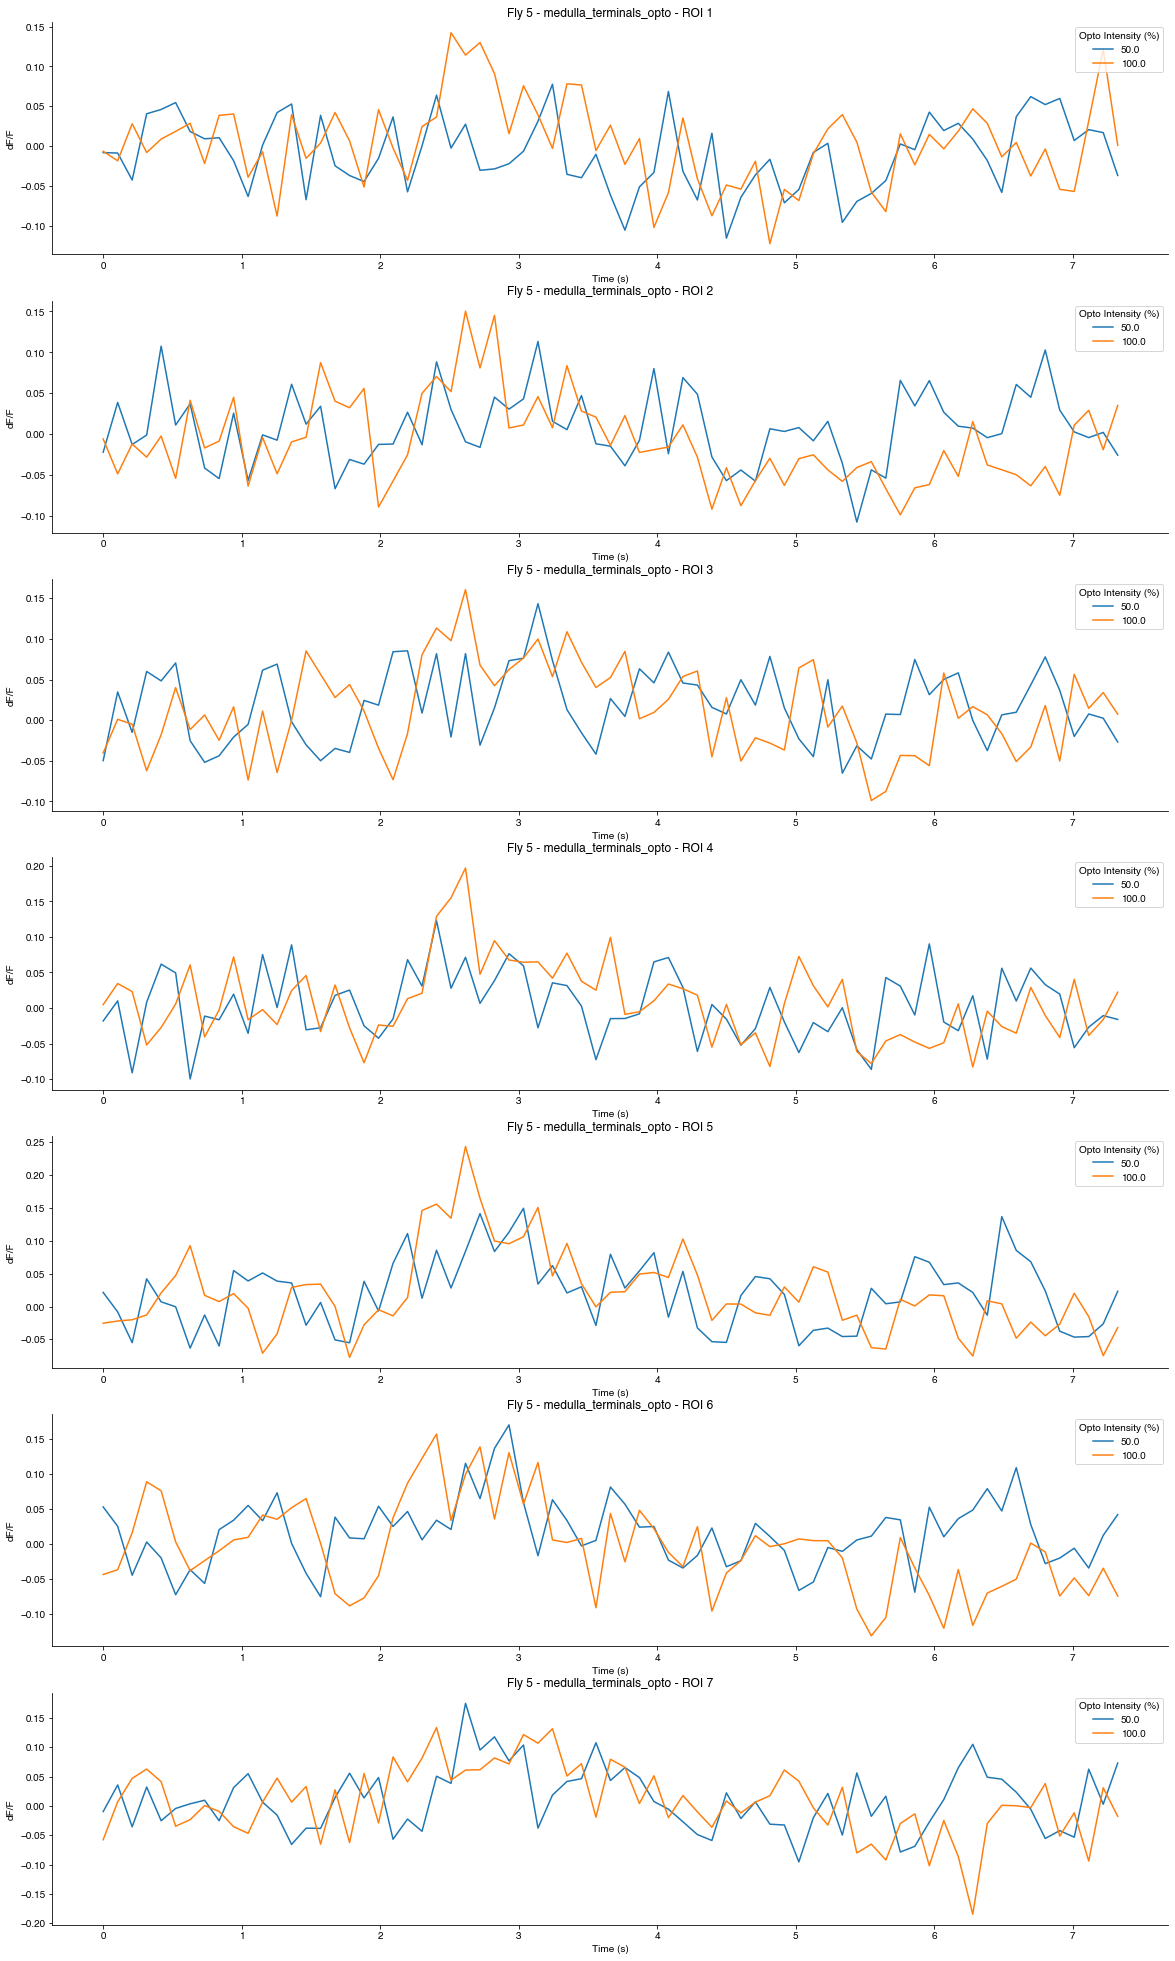

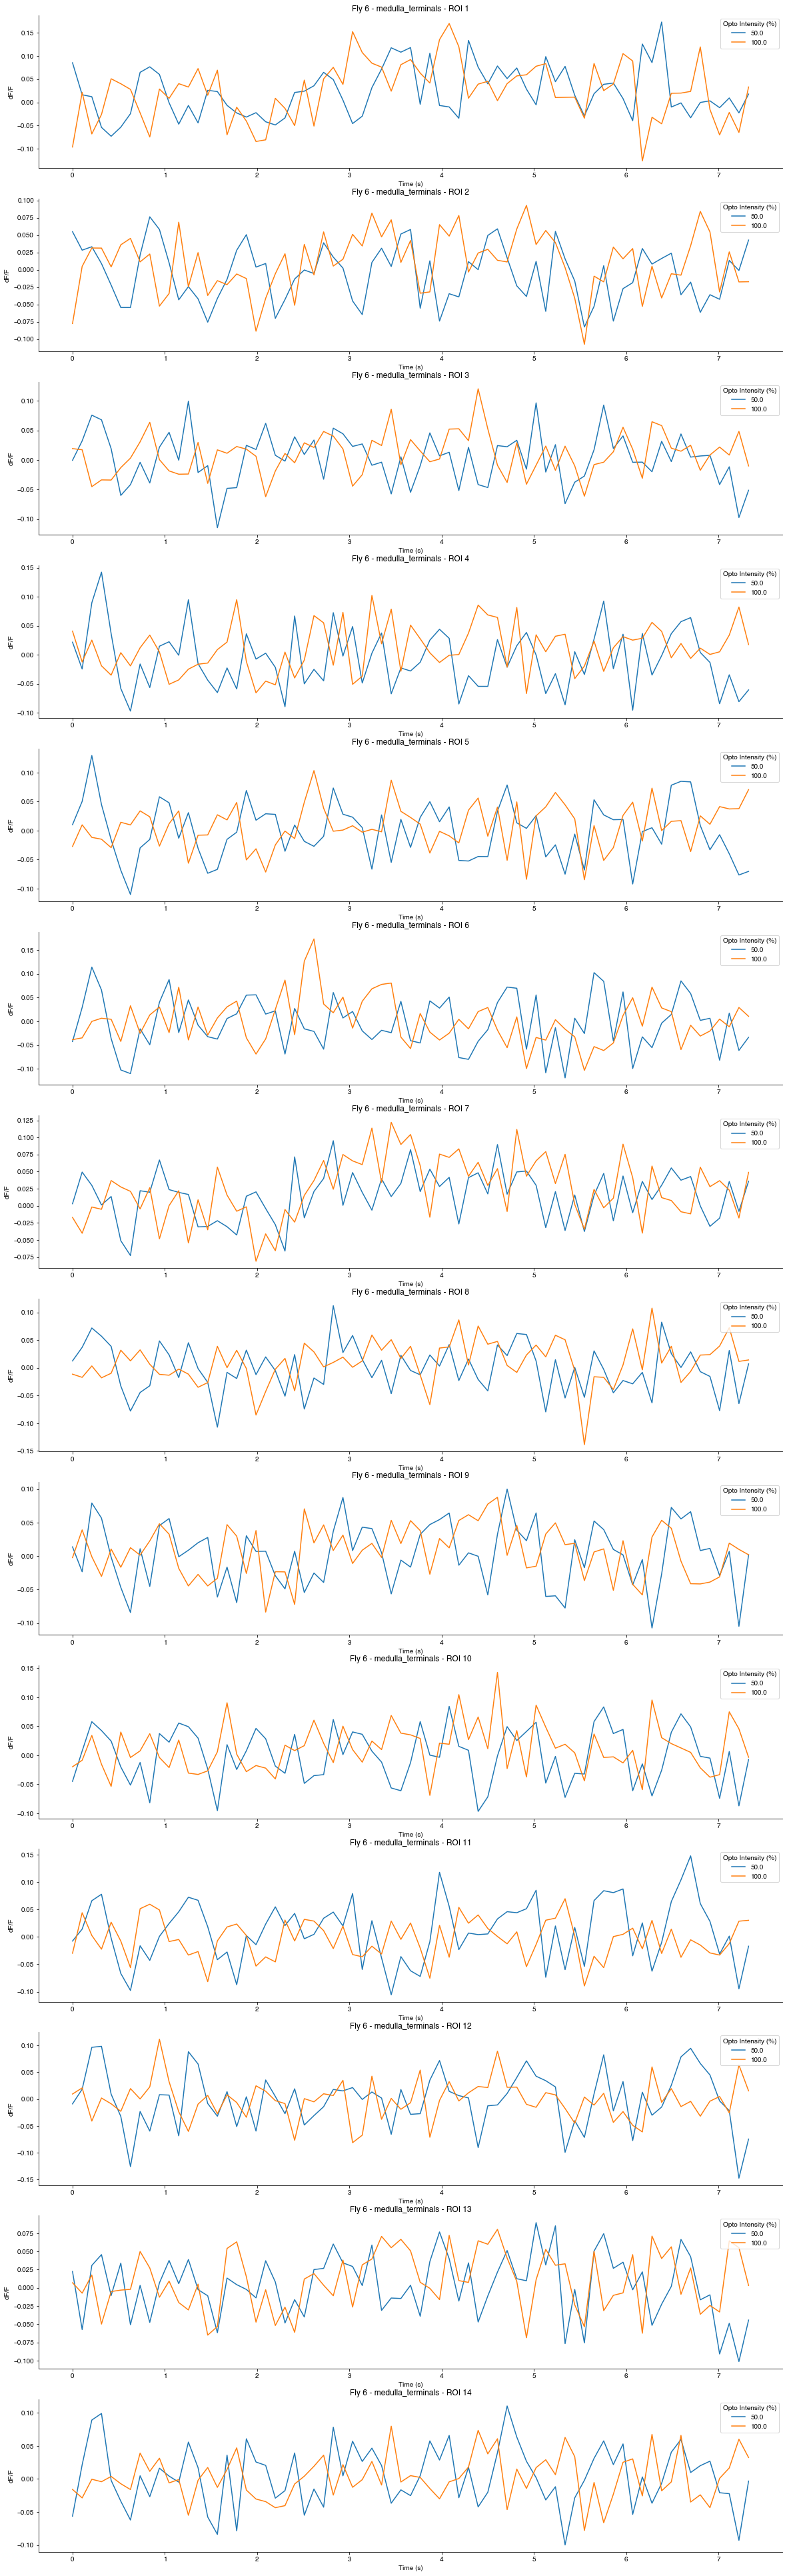

In [126]:
# Call function to get trial data for each fly
which_set = asta_prox_5_24_opto
which_list = asta_fly_list_5_24_opto

for fly_ind in range(len(which_set)):
    unique_parameter_values, mean_response, sem_response, trial_response_by_stimulus_intensity, time_vector = getTrialData(which_set[fly_ind])
    opto_values = calculateOptoPercentages(unique_parameter_values)

    # create subplots for each ROI
    fig, ax = plt.subplots(len(mean_response), 1, figsize=(20, 5*len(mean_response)))

    for roi_ind in range(len(mean_response)):
        # for each opto intensity
        # for opto_ind in range(len(opto_values)): # all opto values
        for opto_ind in [3, 4]: # specific opto values
            # plot the mean response
            ax[roi_ind].plot(time_vector, mean_response[roi_ind][opto_ind], label=opto_values[opto_ind])
            # plot the SEM
            #ax[roi_ind].fill_between(time_vector, mean_response[roi_ind][opto_ind] - sem_response[roi_ind][opto_ind], mean_response[roi_ind][opto_ind] + sem_response[roi_ind][opto_ind], alpha=0.2)
            
        ax[roi_ind].set_title('Fly ' + str(which_list[fly_ind]) + ' - ' + str(which_set[fly_ind][3]) + ' - ROI ' + str(roi_ind+1))
        ax[roi_ind].set_xlabel('Time (s)')
        ax[roi_ind].set_ylabel('dF/F')
        ax[roi_ind].legend(title='Opto Intensity (%)', loc='upper right')
        ax[roi_ind].spines['top'].set_visible(False)
        ax[roi_ind].spines['right'].set_visible(False)

## Plot Average across ROIs for each opto intensity

Calculate LED times

In [115]:
fly = asta_prox_all[0]
file_path = os.path.join(fly[0], fly[1] + ".hdf5")
ID = imaging_data.ImagingDataObject(file_path, fly[2], quiet=True)
# OPTO stim plotting
led_start_time = ID.getRunParameters('pre_time')
led_end_time = led_start_time + ID.getRunParameters('led_duration')[0]   

sem.shape: (5, 71)
sem.shape: (5, 71)
sem.shape: (5, 71)


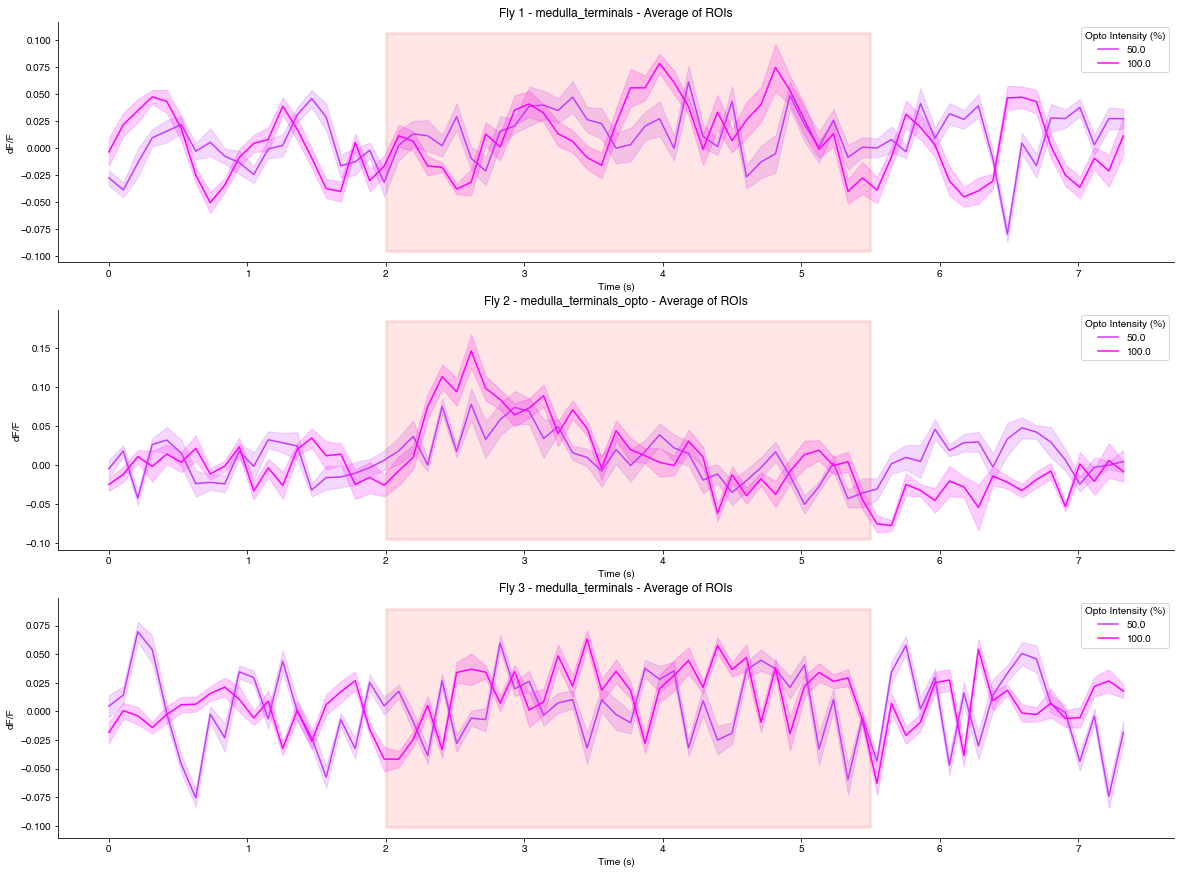

In [121]:
# create subplots for each fly
which_set = asta_prox_5_24_opto
which_list = asta_fly_list_all

cmap = plt.get_cmap('cool') # also 'cool' 'winter' 'PRGn' 'Pastel1' 'YlGnBu' 'twilight'
colors = [cmap(i) for i in np.linspace(0.1, 1.0, len(opto_values))]
fig, ax = plt.subplots(len(which_set), 1, figsize=(20, 5*len(which_set)))

# for each fly, plot the average of the ROIs for each opto intensity
for fly_ind in range(len(which_set)):
    unique_parameter_values, mean_response, sem_response, trial_response_by_stimulus_intensity, time_vector = getTrialData(which_set[fly_ind])
    opto_values = calculateOptoPercentages(unique_parameter_values)
    # calculate sem
    sem = np.std(mean_response, axis=0)/np.sqrt(len(mean_response))
    sem_plus = np.mean(mean_response, axis=0) + sem
    sem_minus = np.mean(mean_response, axis=0) - sem
    print(f'sem.shape: {sem.shape}')

    # for each opto intensity
    # for opto_ind in range(len(opto_values)): # all the opto intensities
    for opto_ind in [3, 4]: # specific opto intensities
        # plot the mean response
        ax[fly_ind].plot(time_vector, np.mean(mean_response, axis=0)[opto_ind], 
                         label=opto_values[opto_ind], color=colors[opto_ind],)
        ax[fly_ind].fill_between(time_vector, sem_minus[opto_ind], sem_plus[opto_ind], 
                                 alpha=0.2, color=colors[opto_ind])
        
    # OPTO stim plotting
    # find the minimum and maximum values of the mean response
    y_low = np.min(sem_minus)*1.1
    y_high = np.max(sem_plus)*1.1
    ax[fly_ind].fill_between([led_start_time, led_end_time], y_low, y_high, 
                    alpha=0.1, edgecolor='r', facecolor='r', linewidth=3,)
        
    ax[fly_ind].set_title('Fly ' + str(which_list[fly_ind]) + ' - ' + str(which_set[fly_ind][3]) + ' - Average of ROIs')
    ax[fly_ind].set_xlabel('Time (s)')
    ax[fly_ind].set_ylabel('dF/F')
    ax[fly_ind].legend(title='Opto Intensity (%)', loc='upper right')
    ax[fly_ind].spines['top'].set_visible(False)
    ax[fly_ind].spines['right'].set_visible(False)

In [104]:
mean_response[:, 1, :].shape

(10, 71)